Notebook Setup
---

In [ ]:
import os
import sys

In [ ]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

Task 1
---

In [ ]:
from CSPclass import *
from utils import parse_neighbors
from algorithms import AC3

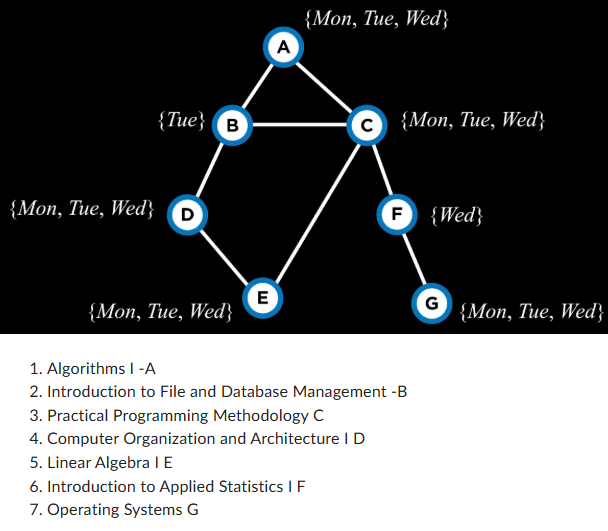

In [ ]:
neighbours = parse_neighbors(
    'CS2040: CS2910 CS2010;'\
    'CS2910: CS2010 CS2290;'\
    'CS2010: MA1200 ST1510;'\
    'CS2290: MA1200;'\
    'MA1200: ;'\
    'ST1510: CS3790;'\
    'CS3790: '
)
domains = {
    'CS2040': ['Mon','Tue','Wed'], # Algorithms I
    'CS2910': ['Tue'],             # Introduction to File and Database Management
    'CS2010': ['Mon','Tue','Wed'], # Practical Programming Methodology
    'CS2290': ['Mon','Tue','Wed'], # Computer Organization and Architecture I
    'MA1200': ['Mon','Tue','Wed'], # Linear Algebra I
    'ST1510': ['Wed'],             # Introduction to Applied Statistics
    'CS3790': ['Mon','Tue','Wed']  # Operating Systems
}
constraints = lambda X, x, Y, y: x != y

In [ ]:
neighbours

In [ ]:
examCSP = CSPBasic(variables = None, neighbors = neighbours, domains = domains, constraints = constraints)
AC3(examCSP)

In [ ]:
for course in examCSP.variables:
    # print(course, examCSP.curr_domains[course])
    if course == 'CS2010' or course == 'CS2290' or course == 'MA1200':
        print(course, examCSP.curr_domains[course])

Task 2
---

In [ ]:
from CSPclass import *
from utils import parse_neighbors
from algorithms import AC3

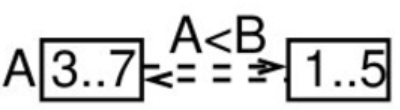

In [ ]:
neighbours1 = parse_neighbors('A: B; B: ')
domains1 = {'A': [3,4,5,6,7], 'B': [1,2,3,4,5]}
def abConstraints(X, x, Y, y):
    if X == 'A' and Y == 'B':
        return x < y
    elif X == 'B' and Y == 'A':
        return x > y
    else:
        return None
# constraints1 = lambda X, x, Y, y: x < y # NOT USED AS LAMBDA FUNCTIONS ARE ANONYMOUS AND YOU CANNOT EXTRACT THE EXPRESSIONS OF THEM

In [ ]:
abCSP = CSPBasic(variables = None, domains = domains1, neighbors = neighbours1, constraints = abConstraints)
AC3(abCSP)

In [ ]:
for var in abCSP.variables:
    print(var, abCSP.curr_domains[var])

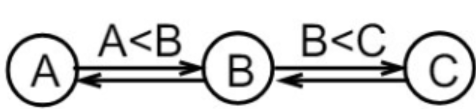

In [ ]:
neighbours2 = parse_neighbors('A: B; B: C')
domains2 = {'A': [a for a in range(1,11)], 'B': [b for b in range(5,16)], 'C': [c for c in range(10,21)]}
def abcConstraints(X, x, Y, y):
    if X == 'A' and Y == 'B':
        return x < y
    elif X == 'B' and Y == 'A':
        return x > y
    elif X == 'B' and Y == 'C':
        return x < y
    elif X == 'C' and Y == 'B':
        return x > y
    else:
        return None

In [ ]:
abcCSP = CSPBasic(variables = None, domains = domains2, neighbors = neighbours2, constraints = abcConstraints)
AC3(abcCSP)

In [ ]:
for var in abcCSP.variables:
    print(var, abcCSP.curr_domains[var])

Task 2 Alternate
---

In [ ]:
from CSPclass import *
from utils import parse_neighbors
from algorithms import AC3v2

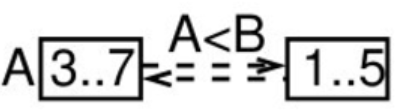

In [ ]:
neighbours3 = parse_neighbors('A: B; B: ')
domains3 = {'A': [3,4,5,6,7], 'B': [1,2,3,4,5]}
constraints3 = ['A < B']

In [ ]:
abCSP2 = CSPBasic(variables = None, domains = domains3, neighbors = neighbours3, constraints = constraints3)
AC3v2(abCSP2)

In [ ]:
for var in abCSP2.variables:
    print(var, abCSP2.curr_domains[var])

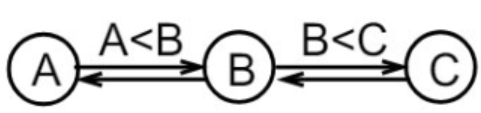

In [ ]:
neighbours4 = parse_neighbors('A: B; B: C')
domains4 = {'A': [a for a in range(1,11)], 'B': [b for b in range(5,16)], 'C': [c for c in range(10,21)]}
constraints4 = ['A < B','B < C']

In [ ]:
abcCSP2 = CSPBasic(variables = None, domains = domains4, neighbors = neighbours4, constraints = constraints4)
AC3v2(abcCSP2)

In [ ]:
for var in abcCSP2.variables:
    print(var, abcCSP2.curr_domains[var])

Task 3
---

In [ ]:
from CSPclass import *
from algorithms import AC3

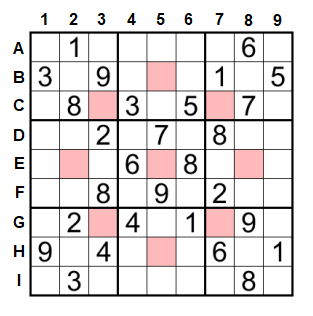

In [ ]:
var1 = list("ABCDEFGHI")
var2 = range(1,10)

vars = set()

for letter in var1:
    for number in var2:
        vars.add(letter + str(number))

In [ ]:
vars

In [ ]:
sudokuNeighbours = {}

for letter in var1:
    for number in var2:
        sudokuNeighbours[letter + str(number)] = []

for key1 in sudokuNeighbours.keys():
    for key2 in sudokuNeighbours.keys():
        if key1 != key2:
            # Deals with neighbours contained in the 3x3 square.
            for letter in [list("ABC"),list("DEF"),list("GHI")]:
                if key1[0] in letter and key2[0] in letter:
                    for number in [range(1,4),range(4,7),range(7,10)]:
                        if eval(key1[1]) in number and eval(key2[1]) in number:
                            sudokuNeighbours[key1].append(key2)
            # Deals with same-row neighbours.
            if key1[0] == key2[0]:
                if key2 not in sudokuNeighbours[key1]:
                    sudokuNeighbours[key1].append(key2)
            # Deals with same-column neighbours.
            elif key1[1] == key2[1]:
                if key2 not in sudokuNeighbours[key1]:
                    sudokuNeighbours[key1].append(key2)
            # Deals with asterisk neighbours.
            asterisk = ['B5','C3','C7','E2','E5','E8','G3','G7','H5']
            if key1 in asterisk:
                for a in asterisk:
                    if a not in sudokuNeighbours[key1] and a != key1:
                        sudokuNeighbours[key1].append(a)

In [ ]:
sudokuNeighbours

In [ ]:
filled = {
    'A2': 1, 'A8': 6,
    'B1': 3, 'B3': 9, 'B7': 1, 'B9': 5,
    'C2': 8, 'C4': 3, 'C6': 5, 'C8': 7,
    'D3': 2, 'D5': 7, 'D7': 8,
    'E4': 6, 'E6': 8,
    'F3': 8, 'F5': 9, 'F7': 2,
    'G2': 2, 'G4': 4, 'G6': 1, 'G8': 9,
    'H1': 9, 'H3': 4, 'H7': 6, 'H9': 1,
    'I2': 3, 'I8': 8
}

sudokuDomains = {var:[filled[var]] if var in filled else [ch for ch in range(1,10)] for var in sudokuNeighbours.keys()}

In [ ]:
sudokuDomains

In [ ]:
sudokuConstraints = lambda X, x, Y, y: x != y
basicSudokuCSP = CSPBasic(variables=sudokuNeighbours.keys(),neighbors=sudokuNeighbours, domains=sudokuDomains, constraints=sudokuConstraints)
AC3(basicSudokuCSP) # WARNING: THIS IS VERY RESOURCE INTENSIVE!

In [ ]:
for var in basicSudokuCSP.variables:
    print(var, basicSudokuCSP.curr_domains[var])